# Assignment 1
**DUE: Sunday June 28, 2020 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel→→Restart) and then run all cells (in the menubar, select Cell→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [ ]:
NAME = "Adriel Naranjo"
STUDENT_ID = "1676622"

## Problem 1 -  Bayes' Theorem

Suppose there exists a test to classify emails as spam or not spam based on the contained words. This test accurately identifies spam (if it is actually spam) 95% of the time. The prevalence of spam emails is 3 in 10. Also, if an email isn't spam, the test will incorrectly classify it as spam 5% of the time.

NOTE: For each of the following questions, please give each answer to at least 2 significant digit accuracy. To accomplish this, don't round off your results until the very last step of each calculation.

 Given from prompt: 

 P(Spam) = 3/10 = .30

 P(~Spam) = 7/10 = .70

P(Spam | Email is spam) = .95

P(Spam | Not spam) = .05

### (a) What's the probability that an email picked at random is spam? What's the probability that an email picked at random isn't spam?

P(Spam) = 3/10 = .30 or 30%

P(~Spam) = 7/10 = .70 or 70%

This question is asking about the prevalance of an email being spam. 

Since the prompt explicitly says that the prevalence of spam emails is 3 in 10, this allowed me to pull this infomation directly from the question. 

Additionally, in order to get the prevalence of non-spam emails, 1 - P(Spam) = .70 was the way I was able to find this result. 

### (b) If you test an email and it reports positive for spam, what is the probability that it is spam?

This question is asking for the probability that an email is spam given it tested postive as spam when put through the classifier. Meaning this question is asking for P(Spam | Classified as spam). 

From the prompt, it states that the classifier will accurately identify spam if it is in fact spam, 95% of the time. 

Therefore P(Spam | Classified as spam) = .95

### (c) If you test an email and it reports negative for spam, what is the probability that it is spam?

This question is asking for the probability that an email is spam given it tested negative as spam when put through the classifier. Meaning this question is asking for P(Spam | ~Classified as spam). 

From the prompt, it states that the classifier will inaccurately identify spam if it is in fact spam, 5% of the time. 

Therefore P(Spam | ~Classified as spam) = .05

## Monte Carlo Simulations

Monte Carlo simulations can yield numeric solutions to probability problems that aren't possible to solve analytically. These simulations are also often easy to code up, and so also provide a way to check one's calculations for problems that amenable to analysis. So this is an important technique to become familiar with.

Basically, one creates a simulation of the situation, and runs many trials that allow one to estimate the probabilities by computing proportions. 

First we give you an example of a Monte Carlo simulation, and then you'll solve such a problem yourself.

### Example

If you toss a coin 10 times, with what probability are you likely to see the subsequence {H, H, T, T} appear?

Be patient, this may take a bit to run, but notice how straightforward the coding is. The simplicity of the Monte Carlo method makes it very powerful.

In [ ]:
from numpy.random import randint
import numpy as np

num_tosses = 10    # tosses per trial
num_trials = 100000

# This sets the feedback interval so we know the program hasn't crashed.
feedback = int(np.round(num_trials / 10))

num_seq_found = 0   # to count the number of target subsequences detected
for t in range(1, num_trials + 1):
    
    # To see the progress.
    if t % feedback == 0:  
        print(np.round(100 * t / num_trials, 1), '%  complete:   prob =', num_seq_found / t)
        
    # Roll the die num_tosses times.
    trial = [randint(1, 3) for _ in range(num_tosses)]
    
    # Find the indices of all the 1s.
    heads = [i for i in range(num_tosses) if trial[i] == 1]
    
    # Search for the correct pattern.
    for j in heads:
        if j < num_tosses - 3 and trial[j] == 1 and trial[j + 1] == 1 and trial[j + 2] == 2 and trial[j + 3] == 2:
            # We've found the target subsequence.
            num_seq_found += 1
    
print('Probability of this subsequence =', num_seq_found / num_trials)

10.0 %  complete:   prob = 0.4419
20.0 %  complete:   prob = 0.4402
30.0 %  complete:   prob = 0.43833333333333335
40.0 %  complete:   prob = 0.43605
50.0 %  complete:   prob = 0.4354
60.0 %  complete:   prob = 0.43598333333333333
70.0 %  complete:   prob = 0.4353
80.0 %  complete:   prob = 0.435525
90.0 %  complete:   prob = 0.43635555555555555
100.0 %  complete:   prob = 0.43729
Probability of this subsequence = 0.43729


## Problem 2  -  Monte Carlo Simulation

Consider two dice: One fair and one unfair. The unfair die has a 50% chance to land on the 6 face, and even chance for the rest of the faces.

Write code that rolls both dice and computes the sum.

Do this many times, and give the mean of all the sums.  This will converge to the expected average sum of both randomly rolled dice. You may need to run this several times to be sure of your accuracy. You can check the correctness of your Monte Carlo Simulation by solving this problem analytically.

Hint:

https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html

In [ ]:
import numpy as np
from numpy.random import choice
from numpy import average

num_trials = 10
num_rolls = 100000

fair_die = [1, 2, 3, 4, 5, 6]
unfair_die = [1, 2, 3, 4, 5, 6]
unfair_distribution = [.1, .1, .1, .1, .1, .5]

mean_sum = None
trials_list = []
rolls_list = []

# for each trial 
for i in range(1, num_trials + 1):

  # for each roll 
  for j in range(1, num_rolls + 1): 

    # roll the dice and add each value
    roll_value = choice(fair_die) + choice(unfair_die, p=unfair_distribution)

    # store each rolls value in a list for storage
    rolls_list.append(roll_value)
  
  # after rolling j times, compute the average for trial i 
  single_trial_average = average(rolls_list)
  print("Trial", i, "Result:", single_trial_average)

trials_list.append(single_trial_average)

mean_sum = average(trials_list)
print()
print("Mean sum result of", num_trials, "trials with", num_rolls,"rolls per trail:", round(mean_sum))

Trial 1 Result: 8.01949
Trial 2 Result: 8.00515
Trial 3 Result: 8.00234
Trial 4 Result: 8.001565
Trial 5 Result: 8.000652
Trial 6 Result: 8.000026666666667
Trial 7 Result: 8.000997142857143
Trial 8 Result: 8.00084375
Trial 9 Result: 8.001376666666667
Trial 10 Result: 8.002536

Mean sum result of 10 trials with 100000 rolls per trail: 8.0




mean sum = 8

The way I set up my Monte Carlo Simulation was by creating two lists, one for trials and one for rolls. 

For each trial, I roll both dice 100000 and storing each sum into the rolls list. 

After each trial the rolls list contains 100000 values which is then averaged. The averaged value is then stored into the trials list for that particular trial. 

After all trials are complete, the average of the trials is computed and stored into mean sum which for my experiment is 8. 

This was fun :)


## Problem 3 - Data Processing



There are three types of data:

1.   **Numerical**: For example height, price of a good, heart rate and so on. These data are quantitative in nature.
2.   **Categorical**: While these are qualitative in nature. For example "Yes" or "No", "Red","Green" or "Blue" and "Doggo" or "Kitty".
3.   **Ordinal**: This is a combination of the above, for example movie ratings of 1-5.
 


Machine learning algorithms need data to work. Before you start applying machine learning, you must process your data into a form a machine learning model will expect. This is known as **data preprocessing**.  

The data we are working with pertains to the airline domain in India. It was used in a hackathon, where the goal was to predict airline prices given a set of *features*. First let's download a dataset, go to link http://download853.mediafire.com/orceo1u9llng/l7j86drkdln9aye/Data_Train.xlsx and download the Data_Train.xlsx. Then upload the file to your notebook (without renaming) by clicking on the File icon on the left side and then clicking "Upload" and upload the "Data_Train.xlsx" file.

Now that we have some data, we need the appropriate libraries to first read the data in and if need be manipulate the data for use in machine learning.

In [ ]:
# We import pandas, a Python library that allows us to read in common data formats such as .csv, .xlsx, etc... 
# as a dataframe, essentially a matrix of features.
import pandas as pd
df = pd.read_excel('Data_Train.xlsx')  # Read in the data we downloaded
df.dropna(inplace=True)

In [ ]:
# We can examine the data by looking at the first 5 entries using the head() function.
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Exploratory Data Analysis

Before we start processing we should examine our data. This is known as exploratory data analysis.

Use seaborn to carry out data exploratory analysis to observe the distribution of Airlines.

[HINT: Use sns.countplot()]

(a) Comment on the distribution of Airlines and what this could mean for price prediction?

Some takeaways from this plot: 

-Price may vary depending on destination of flier. 
-Price may vary by the services each Airline provides 
-Jet Airways may have the best prices for the quality of service they provide  
-Jet Airways may in a way dictate market price being the volume of flights they do

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

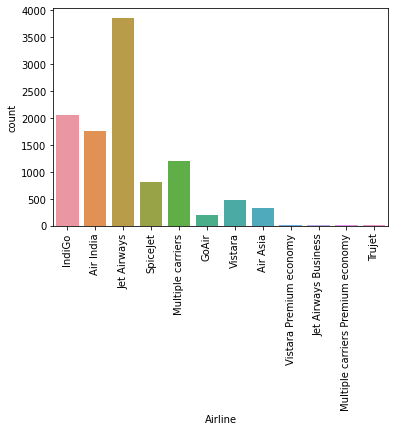

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Used for plotting

"""
use sns.countplot() to show distribution of Airline's
x axis: Airline name 
y axis: # of entries
"""

sns.countplot('Airline',data=df)
plt.xticks(rotation=90)


### Data Preprocessing and Feature Engineering

We observe that this dataset has a mixture of data types ranging from: strings, date-time strings, and integers. 

Now we are ready to do some data preprocessing! Let's pretend we want to predict "Price", then it is reasonable to assume  "Airline", "Date_of_Journey", "Source", "Destination" , and "Route" could be useful features. We ignore "Dep_Time", "Arrival_Time" and "Duration". Similarly "Total_Stops" can be inferred from "Route" and "Additional_Info" could be useful in the future but for now we ignore it.

The goal of preprocessing is to handle any irregularities in the dataset such as missing values, awkwardly formatted entries and any other outlier cases (also known as data cleaning).
An example of a case we would need to deal with is in "Arrival_Time" row 1, the time and date is specified while other rows only have the time. A decision would have to be made whether or not to keep the date or just use the time. 

After our data is cleaned, we can confidently transform our data into the form machine learning models expect. Machine learning models are mathematical models and they work with vectors and matricies. Therefore after we finishing preprocessing we should have a dataframe of numbers i.e a matrix.

#### (b) Processing: "Airline", "Source" and "Destination"

The data in these columns are strings and therefore not numerical. They must be transformed. There are several ways to do this transformation, but you can try the most simple method for this assignment. 

Given these columns transform the entries from strings to numerical data by:

i) First for **Airline** column define a **vocabulary**, that is a collection of all the unique words. 

ii.) Define a vocabulary **vocabulary** using the combined words of **Source** and **Destination**.

ii) Second, with the knowledge of each unique word create mapping of each word to a unique integer.

iii) Third, with your mapping apply it to each column to complete the transformation to a numerical representation.

In [ ]:
# Step 1: Create a vocabulary for each column
source_voc = set(df.Source.unique())
dest_voc = set(df.Destination.unique())

union_wo_dups = dest_voc - source_voc

vocabulary = list(source_voc) + list(union_wo_dups)
airline_voc = df.Airline.unique()

#print(vocabulary)
#print(airline_voc)



# Step 2: Create a mapping function from each word in the vocabulary to a unique integer

location_dict = {location_name:i for i, location_name in enumerate(vocabulary)}
airline_dict = {airline_name:i for i, airline_name in enumerate(airline_voc)}
#print(airline_dict)
#print(location_dict)



# Step 3: Replce all words in the original data with the assigned integers

def integer_encode_location_name(location_name):
  return location_dict[location_name]

def integer_encode_airline_name(airline_name):
  return airline_dict[airline_name]


df['Source'] = df['Source'].apply(integer_encode_location_name)
df['Destination'] = df['Destination'].apply(integer_encode_location_name)
df['Airline'] = df['Airline'].apply(integer_encode_airline_name)

#df = df.drop(columns=['source_num'])
#df = df.drop(columns=['destination_num'])


df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,1/05/2019,1,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,2,9/06/2019,4,6,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,0,12/05/2019,1,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,0,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### (c) Processing: "Date_of_Journey"

i) The entries in this column cannot be understood by any machine learning model as is. We must transform them to numerical representation.

Using pandas separate the dates into separate "Months" and "Weekdays". 

See example of creating a new column below.

HINT: dt.day_name() gets the weekday from a datatime format
and dt.month_name() gets the month name.

In [ ]:
import datetime as dt # Used to deal with dates

In [ ]:
# Overwrite column to be in datatime format
# That is: YYYY/MM/DD -> YYYY-MM-DD
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [ ]:
df['day_of_week'] = pd.DatetimeIndex(df['Date_of_Journey']).day

In [ ]:
df['Journey_Month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_week,Journey_Month
0,0,2019-03-24,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,1,2019-01-05,1,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,2,2019-09-06,4,6,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,0,2019-12-05,1,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,0,2019-01-03,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


ii) Now that you have these new columns, are these features ready for a machine learning model? Please explain.


No, I do not believe these features are ready for a machine learning model because the encoding that was done does not provide any metrics we can use for analysis. I have only mapped string/categorical value into numeric values for ingestion of a model. The next step, part(d), will be the finishing step of processing so that I can at least create a feature that will imply something about the data that was given. 

#### (d) Processing: Route

Processing "Route" is tricky as they are all different lengthed strings. Why is this a problem? It doesn't have to be if we feed our algorithm an entry one by one but that can be slow. We want to utilize the fact computers are designed to do matrix operations quickly.

To preprocess the "Route" column do the following:

i) Separate the strings by the empty string using split().

ii) Determine a vocabulary made up of each unique airport code and you may include the arrow that separates the codes.

iii) Using this vocabulary information devise a way to make sure all the strings/features are the same size and **NO NEED TO IMPLEMENT** it. Discuss why you choose that method and any limitations you can think of. [HINT: Think about the vocabulary approach from above and an approach called one hot encoding.]


In [ ]:
route_voc = []

# go through all the routes
for route in df.Route:

  # split the up places and the arrows from each other 
  split_route = route.split()

  # go through the split up pieces 
  for place in split_route:

    # if the place hasnt been seen yet then add it to the list of places 
    if place not in route_voc and len(place) >= 3:
      route_voc.append(place)

# create mapping
route_dict = {route_name:i for i, route_name in enumerate(route_voc)}

print(route_dict)

{'BLR': 0, 'DEL': 1, 'CCU': 2, 'IXR': 3, 'BBI': 4, 'LKO': 5, 'BOM': 6, 'COK': 7, 'NAG': 8, 'MAA': 9, 'AMD': 10, 'PNQ': 11, 'IDR': 12, 'GAU': 13, 'HYD': 14, 'BHO': 15, 'JAI': 16, 'ATQ': 17, 'JDH': 18, 'GOI': 19, 'BDQ': 20, 'TRV': 21, 'IXU': 22, 'IXB': 23, 'UDR': 24, 'RPR': 25, 'DED': 26, 'VGA': 27, 'VNS': 28, 'ISK': 29, 'IXC': 30, 'PAT': 31, 'JLR': 32, 'KNU': 33, 'GWL': 34, 'VTZ': 35, 'NDC': 36, 'HBX': 37, 'IXZ': 38, 'IMF': 39, 'IXA': 40, 'STV': 41}


Since I have created a dictionary that contains all of the route sources/destinations, I can easily use this dictionary to produce a 2-d array that would one-hot encode the route for that particular trip. The 2-d array would be stored in a new column called, route_matrix so that we could simply look up the mapping for analysis instead of parsing through each route one by one. This method is not ideal because is requires us to look through a matrix with 42 entries at least twice (a trip that only contains one ->) in order to analyze. I chose this method because it is more of a brute force way to put together routes and simple to think about in my opinion. Regardless, this method should work and is viable. 

#### (e) Feature Engineering
Surprise surprise! We have been doing feature engineering all along by preprocessing the data and trasnforming or engineering it into a form a machine learning algorithm will expect.

But this doesn't mean the features cannot be improved!

Consider the "Airline" column from part a) each airline is mapped to a unique integer. Imagine a scenario where we have hundreds of unique airlines, the airline mapped to 100 for example would be weighted more than the airline mapped to 1. Similarly for columns "Source" and "Destination". To fix this discrepancy, we utilize standardization or normalization.

Use standarization to map all the values in these columns to the range [0,1] by using the following expression: 

```scaled_value = (value - min) / (max - min)```.

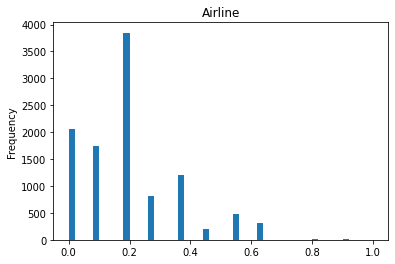

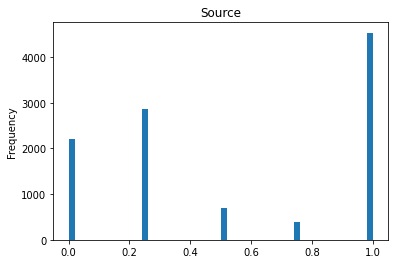

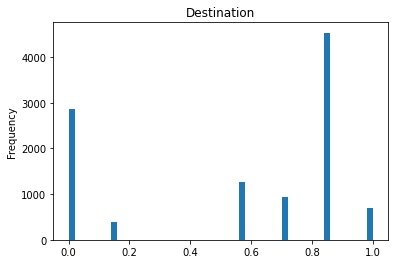

In [ ]:
# A function that normalizes columns of data 
def normalize_col(col):
  return (col - col.min()) / (col.max() - col.min())


# Set Operations to make for loop below look clean 
all_columns = set(df.columns)
target = ['Airline', 'Source', 'Destination']

not_a_target = all_columns - set(target)


# Iterates through columns 
for col in df:

    # if the current column being looked at is not a target jump to the top of the for loop
    if col in not_a_target:
      continue

    # must be a target column to get this far to be normalize
    df[col] = normalize_col(df[col])

    # sets up & displays histogram for targeted columns
    df[col].plot.hist(bins=50, title = col)
    plt.show()